# 웹크롤링 맛보기
#### 웹트롤링: 웹 페이지에 있는 정보를 가지고 오는 행위
#### selenium 라이브러리의 webdriver를 활용해 웹 브라우져 조작
#### BeautifulSoup 라이브러리를 활용해 웹페이지상의 HTML 데이터에서 필요한 정보를 가져온다.
#### webdriver를 활용하기 위해서는 사용중인 웹브라우져 종류에 따라 제어하는 드라이버가 필요한데, 여기서는 크롬드라이버를 사용한다.

### selenium과 크롬드라이버 설치

In [1]:
!pip install selenium

     ---------------------------------------- 9.5/9.5 MB 9.4 MB/s eta 0:00:00
     -------------------------------------- 467.7/467.7 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0


In [2]:
# 예제 2-34 selenium 라이브러리 불러오기
from selenium import webdriver

※ import 에러 날 경우 라이브러리 설치:   `!pip install selenium`

In [12]:
# selenium 설치하기 (미설치 된 경우에 진행)
#! pip install selenium

- 크롬 드라이버는 selenium의 webdriver를 통해 파이썬에서 크롬 브라우져를 제어할 수 있게 해준다.

![ex_screenshot](./그림2-9.png)


- 크롬드라이버 다운받기
https://sites.google.com/a/chromium.org/chromedriver/downloads

https://chromedriver.chromium.org/downloads

### 크롬드라이버 활용하기

In [15]:
from selenium import webdriver

driver = webdriver.Chrome()

### 웹 페이지 접속


In [16]:
# URL 접속하기, 네이버 접속
url = 'http://naver.com'
driver.get(url)

### 웹 페이지(HTML) 다운로드

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="
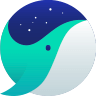
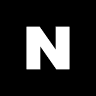

In [17]:
# 웹페이지 html 다운로드 하기
html = driver.page_source
html

### HTML 구조 살펴보기


### HTML 구조
#### 시장에서 판매중인 바나나와 파인애플에 대한 정보가 담긴 HTML예시
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>

### 크롬 브라우저에서 웹 페이지의 HTML 살펴보기

#### 1. 웹 페이지 접속
#### 2. : 개발자도구 활성화
#####       크롬메뉴 -> [[도구 더보기] -> [개발자 도구] 
#### 3. 다른방법 
####     - 단축키 F12
####     - 웹 페이지내에서 마우스 오른쪽 버튼 -> [검사]       
#### 1. 웹 페이지 접속


### BeautifulSoup을 이용한 정보 찾기
#### 웹 브라우져에서 특정 사이트에 접속한 뒤, driver.page_source를 이용해 HTML을 다운하면 위의 정보가 있다고 가정하자.
#### 이 문자열 데이터를 HTML 형식으로 읽고, 정보를 쉽게 찾을 수 있도록 해주는 라이브러리가 BeautifulShop 라이브러이 이다.

In [18]:
# 실습용 HTML
# '''를 이용해 여러줄에 걸친 문자열을 입력
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''


In [19]:
# HTML 문자열 BeautifulSoup 으로 해석하기
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

### HTML 정보 찾기 ① - 태그 속성 활용
#### BeautifulSoup 명령어인 select('조건')을 이용하면, HTML 내에서 입력한 조건을 만족하는 태그를 선택할 수 있다.

In [21]:
# 태그명으로 태그 찾기
tags_span = soup.select('span')
tags_span

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [25]:
tags_p = soup.select('p')
tags_p

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [22]:
# id와 class로 태그 찾기 id는 id명 앞에 #을 붙임

ids_fruits1 = soup.select('#fruits1')
ids_fruits1

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [30]:
# class가 price인곳 출력 클래스는 클래스명 뒤에. 점붙임

class_price = soup.select('.price')
class_price

[<span class="price"> 3000원 </span>]

In [32]:
tags_span_class_price = soup.select('span.store')
tags_span_class_price

[<span class="store"> 가나다상회 </span>]

### HTML 정보 찾기 ② - 상위 구조 활용

In [35]:
# 태그 구조로 위치 찾기①
tags_name = soup.select('span.name')
tags_name

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [38]:
# 태그 구조로 위치 찾기②
tags_banana1 = soup.select('#fruits1>span.name')
tags_banana1

[<span class="name"> 바나나 </span>]

In [39]:
# 태그 구조로 위치 찾기③
tags_banana2 = soup.select('div.sale>#fruits1>span.name')
tags_banana2

[<span class="name"> 바나나 </span>]

In [41]:
tags_banana3 = soup.select('div.sale span.name')
tags_banana3

[<span class="name"> 바나나 </span>]

### 정보 가져오기 ① - 태그 그룹에서 하나의 태그 선택하기

In [42]:
# 태그 그룹에서 하나의 태그만 선택하기
tags = soup.select('span.name')
tags

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [43]:
tags[0]

<span class="name"> 바나나 </span>

In [44]:
# 태그 그룹에서 반복문으로 태그 하나씩 선택하기
for tag in tags:
    print(tag)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


### 정보 가져오기 ② - 선택한 태그에서 정보 가져오기

In [45]:
# 태그에서 텍스트 가져오기
content = tag.text
content

' 파인애플 '

In [47]:
# 태그에서 속성 값 가져오기

# 클래스 이름 출력
attribute = tag['class']
attribute

['name']

In [48]:
tag = soup.select('a')
print(tag)

[<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>]


In [53]:
content = tag[0].text
content

' 홈페이지 '

In [56]:
link = tag[0]['href']
link

'http://bit.ly/forPlaywithData'